<a href="https://colab.research.google.com/github/boiledtech-dev/Comic_Creator/blob/main/scanner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# importing libraries

import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [8]:
!pip install opencv-contrib-python

(612, 612, 3)
(800, 1500, 3)


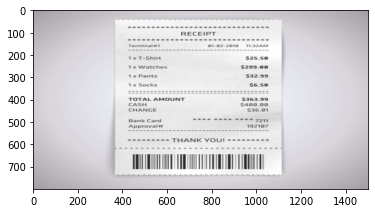

In [9]:
im_path = "/content/recrecrec.jpeg"
#im_path = "/images(24)"
# read image from path
img = cv2.imread(im_path)
print(img.shape)

# image resize
img = cv2.resize(img, (1500, 800))
print(img.shape)

plt.imshow(img)
plt.show()

#blue green red format : blue greeen red - red green blue



In [ ]:

# remove noise from img

## image bluring

orig = img.copy()
gray = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap = "binary") 
plt.show()

blurred = cv2.GaussianBlur(gray, (5,5), 0)
plt.imshow(blurred, cmap = "binary")
# edge detection

# contour extractoin

# contour selection

# project to screen

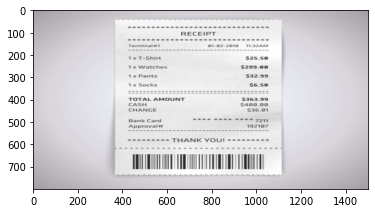

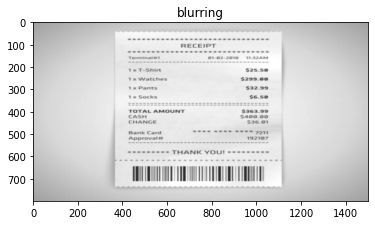

(800, 1500, 3)


In [ ]:
regen = cv2.cvtColor(blurred, cv2.COLOR_GRAY2BGR)
plt.imshow(orig)
plt.show()
plt.imshow(regen)
plt.title("blurring")
plt.show()
print(regen.shape)

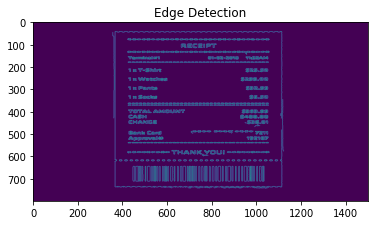

In [ ]:
# edge detection
edge = cv2.Canny(blurred, 0,50)
orig_edge = edge.copy()
plt.imshow(orig_edge)
plt.title("Edge Detection")
plt.show()

In [1]:
# contour extraction

contours, _ = cv2.findContours(edge, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print(len(contours))
contours = sorted(contours, reverse = True, key = cv2.contourArea)
plt.imshow(contours)
plt.show()

NameError: ignored

In [ ]:
# select contour region
for c in contours:
  p = cv2.arcLength(c,True)
  approx = cv2.approxPolyDP(c, 0.01 * p, True)

  if (len(approx) == 4):
    target = approx
    break
print(target.shape)

(4, 1, 2)


In [ ]:
## reorder target contour

def reorder(h):
  h = h.reshape((4,2))
  print(h)

  hnew = np.zeros((4,2), dtype = np.float32)

  add = h.sum(axis = 1)
  hnew[3] = h[np.argmax(add)]
  hnew[1] = h[np.argmax(add)]

  diff = np.diff(h, axis = 1)
  hnew[0] = h[np.argmax(diff)]
  hnew[2] = h[np.argmax(diff)]

  return hnew




In [ ]:
reorder = reorder(target)
print("*************")
print(reorder)
 

[[1027  644]
 [1026  710]
 [1033  711]
 [1034  645]]
*************
[[1026.  710.]
 [1033.  711.]
 [1026.  710.]
 [1033.  711.]]


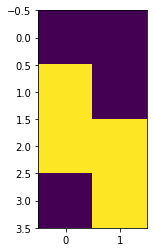

In [ ]:
## project to a fixed screen

input_representation = reorder
output_map = np.float32([[0,0], [800, 0], [800,800], [0,800]])
plt.imshow(output_map)
plt.show()


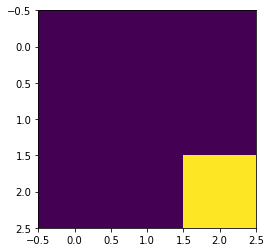

In [ ]:
M = cv2.getPerspectiveTransform(input_representation, output_map)
ans = cv2.warpPerspective(orig, M, (800,800))
plt.imshow(M)
plt.show()

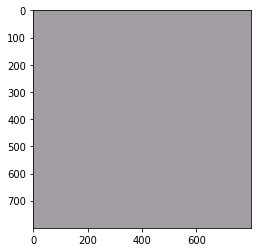

In [ ]:
plt.imshow(ans)
plt.show()

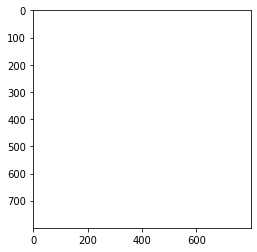

In [ ]:
res = cv2.cvtColor(ans, cv2.COLOR_BGR2GRAY)
b_res = cv2.GaussianBlur(res, (3,3), 0)
plt.imshow(res , cmap = "binary")
plt.show()


In [ ]:
## Restarting